# Laboratory of Computational Physics mod. B at Phisics of Data, University of Padova

__Authors:__

- Valeria Fioroni (University of Padova)
- Matteo Guida (University of Padova)
- Philipp Zehetner (University of Padova, Ludwig Maximilian University of Munich)

__Supervised by:__

- Professor Marco Zanetti (University of Padova, CERN)
- Professor Stefano Lacaprara (University of Padova, BELLE2)

## 1. The Signal

At the SuperKEKB paricle accelerator electrons and positrons collide with a center-of-momentum energy clos to the $ \Upsilon (4S) $ resonance. The cross section for the event $ e^+ e^- \rightarrow \Upsilon (4S) $ is 

$$ 
\sigma_{\Upsilon (4S)} = 1.1 \, nb
$$

The $ \Upsilon (4S) $ decays in one of two (almost) equally probable products: 
- $ \Upsilon (4S) \rightarrow B^+ B^- $
- $ \Upsilon (4S) \rightarrow B^0 \bar{B^0} $

For this analysis we are interested in the decay channel
$$
B^0 \rightarrow \eta' \left( \eta \left( \gamma \gamma \right) \pi^+ \pi^- \right) K^0_S \left( \pi^+ \pi^- \right)
$$

The branching fractions are as follows: 

- $ \mathcal{BF} \left( B^0 \rightarrow \eta' K^0 \right) = 6.6 * 10^{-5} $ 
- $ \mathcal{BF} \left( \eta' \rightarrow \eta \pi^+ \pi^- \right) = 0.43 $
- $ \mathcal{BF} \left( \eta \rightarrow \gamma \gamma \right) = 0.40 $
- $ P \left( K^0_S | K^0 \right) = 0.5 $
- $ \mathcal{BF} \left( K^0_S \rightarrow \pi^+ \pi^- \right) = 0.7 $

This leads to a complete branching ratio of 
$ \mathcal{BF} = 3.97 * 10^{-6} $ 

## 2. Our Data

Our Data consists of labelled data, that we used to train and test a _Deep Neural Network_ (DNN) and a _Boosted Decision Tree_ as well as unlabelled data (Data Challenge) in which we are searching for our signal. 

###  Labelled Data

The labelled data consists of various types of background, all corresponding to an integrated luminosity of 
$ \mathcal{L} = 800 \, fb^{-1} $
and signal corresponding to __NSIGNAL__ reconstructed signal events with an efficiency of 
$ \varepsilon = 0.291 $

- $ e^+ e^- \rightarrow u \bar{u} $
- $ e^+ e^- \rightarrow d \bar{d} $
- $ e^+ e^- \rightarrow s \bar{s} $
- $ e^+ e^- \rightarrow c \bar{c} $
- $ e^+ e^- \rightarrow \tau \bar{\tau} $
- $ e^+ e^- \rightarrow B^+ B^- $
- $ e^+ e^- \rightarrow B^0 \bar{B^0} $

We summarize the first five types of backgrounds as _Continuum Background_ and the last two types as _Peaking Background_ and thus build a multi classifier with three types of events. 

Using the complete branching fraction 
$ \mathcal{BF} $
and the cross section 
$ \sigma_{\Upsilon (4S)} $ 
we can calculate to expect to have $N$ events with 
\begin{equation}
N = \mathcal{L} \times \sigma_{\Upsilon(4S)} \times \mathcal{BF} 
= 800 \, fb^{-1} \times 1.1 \, nb \times 3.97 \cdot 10^{-6}
= 3494
\end{equation}
of which $ \varepsilon \times N = 1017 $ should be found by the reconstruction

###  Data Challenge

The Data Challenge is a simulation corresponding to a total luminosity of 
$ \mathcal{L} = 1 \, ab^{-1} $
We can calculate in the same as above, that we should expect a total number of $ N = 4367 $ signal events of which $1271$ are reconstructed. 

In [1]:
import os, sys, pprint
import math
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings("ignore")
from root_pandas import read_root
from random import seed
from random import randint
n_seed=1234
seed(n_seed)

Local_Philipp = True
Local_Valeria = False

Welcome to JupyROOT 6.16/00


In [2]:
Training = ['B0_Pcms', 'B0_etap_Pcms', 'B0_etap_eta_Pcms', 'B0_etap_eta_gamma0_Pcms', 'B0_etap_eta_gamma1_Pcms', 'B0_etap_pi0_Pcms', 'B0_etap_pi1_Pcms', 'B0_K_S0_Pcms', 'B0_M', 'B0_ErrM', 'B0_SigM', 'B0_K_S0_M', 'B0_K_S0_ErrM', 'B0_K_S0_SigM', 'B0_etap_M', 'B0_etap_ErrM', 'B0_etap_SigM', 'B0_etap_eta_M', 'B0_etap_eta_ErrM', 'B0_etap_eta_SigM', 'B0_deltae', 'B0_mbc', 'B0_TrCSMVA', 'B0_X', 'B0_ErrX', 'B0_Y', 'B0_ErrY', 'B0_Z', 'B0_ErrZ', 'B0_Rho', 'B0_etap_X', 'B0_etap_ErrX', 'B0_etap_Y', 'B0_etap_ErrY', 'B0_etap_Z', 'B0_etap_ErrZ', 'B0_etap_Rho', 'B0_etap_eta_X', 'B0_etap_eta_ErrX', 'B0_etap_eta_Y', 'B0_etap_eta_ErrY', 'B0_etap_eta_Z', 'B0_etap_eta_ErrZ', 'B0_etap_eta_Rho', 'B0_etap_pi0_X', 'B0_etap_pi0_ErrX', 'B0_etap_pi0_Y', 'B0_etap_pi0_ErrY', 'B0_etap_pi0_Z', 'B0_etap_pi0_ErrZ', 'B0_etap_pi0_Rho', 'B0_etap_pi1_X', 'B0_etap_pi1_ErrX', 'B0_etap_pi1_Y', 'B0_etap_pi1_ErrY', 'B0_etap_pi1_Z', 'B0_etap_pi1_ErrZ', 'B0_etap_pi1_Rho', 'B0_K_S0_X', 'B0_K_S0_ErrX', 'B0_K_S0_Y', 'B0_K_S0_ErrY', 'B0_K_S0_Z', 'B0_K_S0_ErrZ', 'B0_K_S0_Rho', 'B0_cosAngleBetweenMomentumAndVertexVector', 'B0_distance', 'B0_significanceOfDistance', 'B0_dr', 'B0_etap_pi0_dr', 'B0_etap_pi1_dr', 'B0_K_S0_dr', 'B0_decayAngle__bo0__bc', 'B0_decayAngle__bo1__bc', 'B0_etap_decayAngle__bo0__bc', 'B0_etap_decayAngle__bo1__bc', 'B0_etap_decayAngle__bo2__bc', 'B0_VtxPvalue', 'B0_etap_VtxPvalue', 'B0_etap_eta_VtxPvalue', 'B0_etap_pi0_VtxPvalue', 'B0_etap_pi1_VtxPvalue', 'B0_K_S0_VtxPvalue']
Important = Training + ['B0_isSignal', 'evt_no']

if Local_Philipp : 
    path = '/home/philipp/Desktop/Project/DATA/'
    SFiles = glob.glob(os.path.join(path, 'Signal/*.root'))
    CFiles = glob.glob(os.path.join(path, 'Continuous/*.root'))
    PFiles = glob.glob(os.path.join(path, 'Peaking/*.root'))
    DCFiles = glob.glob(os.path.join(path, 'DC/*.root'))
    
if Local_Valeria : 
    path = '/home/utente/Scrivania/Progetto LCP-B/DataBelle2_all/'
    SFiles = glob.glob(os.path.join(path, 'Signal/*.root'))
    CFiles = glob.glob(os.path.join(path, 'Background/Continuum/*.root'))
    PFiles = glob.glob(os.path.join(path, 'Background/Peaking/*.root'))
    DCFiles = glob.glob(os.path.join(path, 'DataChallenge/*.root'))
    
Signal = pd.concat((read_root(f, 'B0', columns=Important) for f in SFiles))
Signal = Signal[Signal['B0_isSignal']==1].reset_index(drop=True)
Continuum_bkg = pd.concat((read_root(f, 'B0', columns=Important) for f in CFiles))
Peaking_bkg = pd.concat((read_root(f, 'B0', columns=Important) for f in PFiles))

#Signal: In case of more than 1 candidate per event select the first one occuring
Mask_duplicated = Signal.duplicated(subset='evt_no', keep='first')
Mask_duplicated=np.logical_not(Mask_duplicated)
Signal=Signal[Mask_duplicated]
Signal.reset_index(drop=True, inplace=True)

Signal=Signal[Training]
Continuum_bkg=Continuum_bkg[Training]
Peaking_bkg=Peaking_bkg[Training]

print("Continuum: {} events".format(Continuum_bkg.shape[0]))
print("Peaking: {} events".format(Peaking_bkg.shape[0]))
print("Signal: {} events \n".format(Signal.shape[0]))
print("Assuming, that originally 1.6M signal events existed, this corresponds to a reconstruction efficiencey of {}%".format(100*Signal.shape[0]/1600000))

Continuum: 246329 events
Peaking: 2167 events
Signal: 218596 events 

Assuming, that originally 1.6M signal events existed, this corresponds to a reconstruction efficiencey of 13.66225%


### Preprocessing our Data

- explain steps in preprocessing

In [3]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

n_classes = 3
Signal['Type'] = 2
Continuum_bkg['Type'] = 1
Peaking_bkg['Type'] = 0

# Splitting Data and Label into train, test and validation separatly for each class
X = Signal.drop('Type',axis=1)
Y = Signal['Type']
X_train_S, X_test_val_S, Y_train_S, Y_test_val_S = train_test_split(X, Y, train_size=0.5,random_state=randint(10**6,10**9))
X = X_test_val_S
Y = Y_test_val_S
X_validation_S, X_test_S, Y_validation_S, Y_test_S = train_test_split(X, Y, train_size=0.6,random_state=randint(10**6,10**9))
del(X_test_val_S)
del(Y_test_val_S)
X = Continuum_bkg.drop('Type',axis=1)
Y = Continuum_bkg['Type']
X_train_C, X_test_val_C, Y_train_C, Y_test_val_C = train_test_split(X, Y, train_size=0.5,random_state=randint(10**6,10**9))
X = X_test_val_C
Y = Y_test_val_C
X_validation_C, X_test_C, Y_validation_C, Y_test_C = train_test_split(X, Y, train_size=0.6,random_state=randint(10**6,10**9))
del(X_test_val_C)
del(Y_test_val_C)
X = Peaking_bkg.drop('Type',axis=1)
Y = Peaking_bkg['Type']
X_train_P, X_test_val_P, Y_train_P, Y_test_val_P = train_test_split(X, Y, train_size=0.5,random_state=randint(10**6,10**9))
X = X_test_val_P
Y = Y_test_val_P
X_validation_P, X_test_P, Y_validation_P, Y_test_P = train_test_split(X, Y, train_size=0.6,random_state=randint(10**6,10**9))
del(X_test_val_P)
del(Y_test_val_P)

# Concatenating the different classes, encoding the label as one-hot vectors and shuffling everything
X_Train=np.concatenate((X_train_S, X_train_C, X_train_P), axis=0)
X_Validation=np.concatenate((X_validation_S, X_validation_C, X_validation_P), axis=0)
X_Test=np.concatenate((X_test_S, X_test_C, X_test_P), axis=0)
Y_Train=np.concatenate((Y_train_S, Y_train_C, Y_train_P), axis=0)
Y_Validation=np.concatenate((Y_validation_S, Y_validation_C, Y_validation_P), axis=0)
Y_Test=np.concatenate((Y_test_S, Y_test_C, Y_test_P), axis=0)
Ỳ_Test_not_encoded=Y_Test #used for cut value analysis
Y_Train=to_categorical(Y_Train, num_classes=3)
Y_Validation=to_categorical(Y_Validation, num_classes=3)
Y_Test=to_categorical(Y_Test, num_classes=3)
permutation = np.random.permutation(X_Train.shape[0])
X_Train = X_Train[permutation]
Y_Train = Y_Train[permutation]
permutation = np.random.permutation(X_Validation.shape[0])
X_Validation = X_Validation[permutation]
Y_Validation = Y_Validation[permutation]
permutation = np.random.permutation(X_Test.shape[0])
X_Test = X_Test[permutation]
Y_Test = Y_Test[permutation]

Using TensorFlow backend.


Write something about the 5 sigma mass cut and why we aren't doing it
It's something we tried, so worth mentioning

Write something about scaling and why it is important

In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
pcTrain = ss.fit_transform(X_Train)
pcTest = ss.transform(X_Test)
pcValidation = ss.transform(X_Validation)

In [5]:
X_Train.shape

(233545, 83)

Write something about PCA, and why we are not doing it

## 3. The Neural Network

explain what neural network we are using, how we have been training it

In [6]:
from keras.models import load_model
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

Model1 = load_model('Models/LastTry/Best_Model.h5')
Model2 = load_model('Models/LateNight/Best_Model.h5')

print(Model1.summary())
print(Model1.evaluate(pcTest, Y_Test))
print(2*'\n')
print(Model2.summary())
print(Model2.evaluate(pcTest, Y_Test))

W0723 21:26:41.735281 140067918698304 deprecation_wrapper.py:119] From /home/philipp/anaconda3/envs/Belle/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 21:26:41.746563 140067918698304 deprecation_wrapper.py:119] From /home/philipp/anaconda3/envs/Belle/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 21:26:41.747135 140067918698304 deprecation_wrapper.py:119] From /home/philipp/anaconda3/envs/Belle/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0723 21:26:41.753377 140067918698304 deprecation.py:506] From /home/philipp/anaconda3/envs/Belle/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropou

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_148 (Dropout)        (None, 83)                0         
_________________________________________________________________
dense_662 (Dense)            (None, 50)                4200      
_________________________________________________________________
dense_663 (Dense)            (None, 100)               5100      
_________________________________________________________________
dense_664 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_665 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_666 (Dense)            (None, 3)                 153       
Total params: 24,603
Trainable params: 24,603
Non-trainable params: 0
_________________________________________________________________
None
9

OMP: Info #212: KMP_AFFINITY: decoding x2APIC ids.
OMP: Info #210: KMP_AFFINITY: Affinity capable, using global cpuid leaf 11 info
OMP: Info #154: KMP_AFFINITY: Initial OS proc set respected: 0-3
OMP: Info #156: KMP_AFFINITY: 4 available OS procs
OMP: Info #157: KMP_AFFINITY: Uniform topology
OMP: Info #179: KMP_AFFINITY: 1 packages x 2 cores/pkg x 2 threads/core (2 total cores)
OMP: Info #214: KMP_AFFINITY: OS proc to physical thread map:
OMP: Info #171: KMP_AFFINITY: OS proc 0 maps to package 0 core 0 thread 0 
OMP: Info #171: KMP_AFFINITY: OS proc 2 maps to package 0 core 0 thread 1 
OMP: Info #171: KMP_AFFINITY: OS proc 1 maps to package 0 core 1 thread 0 
OMP: Info #171: KMP_AFFINITY: OS proc 3 maps to package 0 core 1 thread 1 
OMP: Info #250: KMP_AFFINITY: pid 20695 tid 20695 thread 0 bound to OS proc set 0
OMP: Info #250: KMP_AFFINITY: pid 20695 tid 20799 thread 1 bound to OS proc set 1
OMP: Info #250: KMP_AFFINITY: pid 20695 tid 20801 thread 2 bound to OS proc set 2
OMP: Info 

Talk about the performance of our model 

- Model.evaluate with Test sample
- ROCK Curve
- Confusion Matrix

## 4. XGBOOST

- Same story here as in the last chapter
- Advantages/Disadvantages compared to the DNN

## 5. Deciding on the Cut Value of our Network

- all necessary steps and explanations for the cut value

In [7]:
Test_prob = Model1.predict(pcTest)
np.argmax(Test_prob, axis=1)

min_cut = 0.96
max_cut = 0.999
n_steps = 100
step_size = (max_cut-min_cut)/n_steps

cut_values = []
metriks1 = []
metriks2 = []
N_Ss = []
N_Bs = []

for i in range(0, n_steps) : 
    cut_value = min_cut + i*step_size
    cut_values.append(cut_value)
    N_S = 0
    N_B = 0
    for j in range(len(Test_prob)) : 
        if Test_prob[j][2] > cut_value :           #we classify it as signal
            if Y_Test[j][2] == 1 : N_S += 1        #it actually is signal
            elif Y_Test[j][2] == 0 : N_B +=1       #it isn't signal
            else : print("Unexpected!")            #This should not happen
    
    N_S = 0.00463101 * N_S
    #N_S = 1 * N_S

    N_Ss.append(N_S)
    N_Bs.append(N_B)
    metrik1 = N_S/(math.sqrt(N_B+N_S))
    metriks1.append(metrik1)
    metrik2 = N_S/math.sqrt(N_B)
    metriks2.append(metrik2)
    
cut = cut_values[np.argmax(metriks1)]

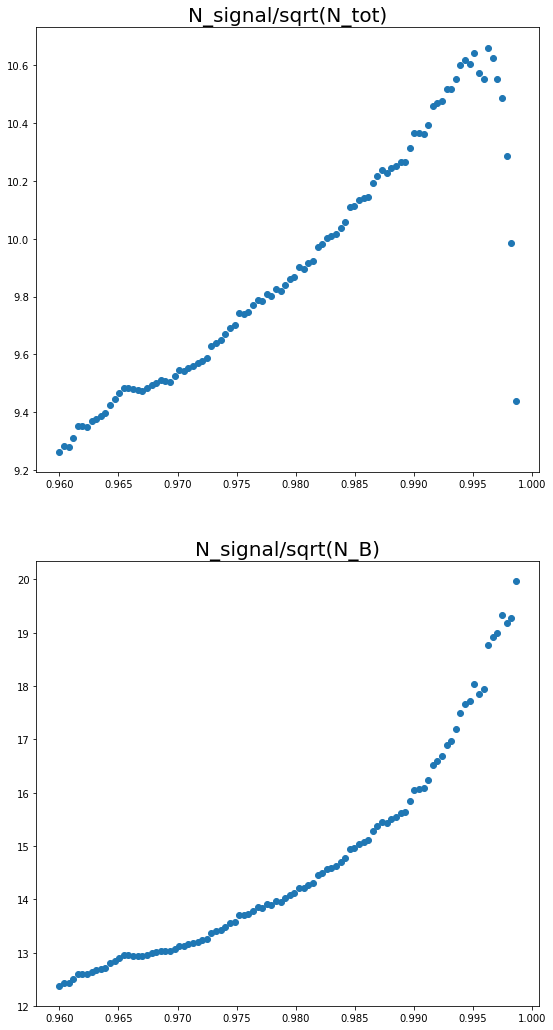

Maximum for N_signal/sqrt(N_tot) at  0.99627


In [8]:
fig, ax = plt.subplots(2,1,figsize = (9,18))
ax[0].plot(cut_values, metriks1, 'o')
ax[0].set_title("N_signal/sqrt(N_tot)",fontsize=20)
ax[1].plot(cut_values, metriks2, 'o')
ax[1].set_title("N_signal/sqrt(N_B)",fontsize=20)
plt.show()
print("Maximum for N_signal/sqrt(N_tot) at ", cut)

In [9]:
cut = cut_values[np.argmax(metriks1)]
N_TS, N_WS = 0,0

for j in range(len(Test_prob)) : 
        if Test_prob[j][2] > cut :           #we classify it as signal
            if Y_Test[j][2] == 1 : N_TS += 1        #it actually is signal
            elif Y_Test[j][2] == 0 : N_WS +=1       #it isn't signal
            else : print("Unexpected!")            #This should not happen
                
                
N_Sig = 0
for y in Y_Test : 
    if np.array_equal([0,0,1], y) : N_Sig +=1
        
eps = N_TS/N_Sig
print ("Efficiency with our cutvalue {}: ".format(cut), eps )

Efficiency with our cutvalue 0.99627:  0.8290484903934127


## 6. The Data Challenge

Here we con showcase the perfect performance of our network

In [10]:
DC = pd.concat((read_root(f, 'B0', columns=Important) for f in DCFiles)).reset_index(drop=True)
DC = DC[Training]
pcDC = ss.transform(np.array(DC.values))

In [16]:
DC_prob = pd.DataFrame(Model1.predict(pcDC))
DC_Signal = DC[DC_prob[2] > cut]
print("{} signals found in DC files".format(DC_Signal.shape[0]))

166 signals found in DC files


In [12]:
DC_prob[DC_prob[2] > cut].shape

(166, 3)

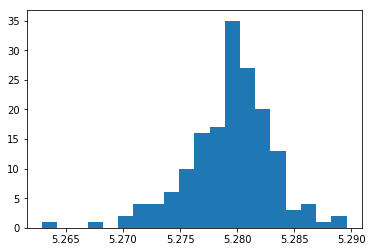

In [13]:
plt.hist(DC_Signal['B0_mbc'], bins=20)
plt.show()

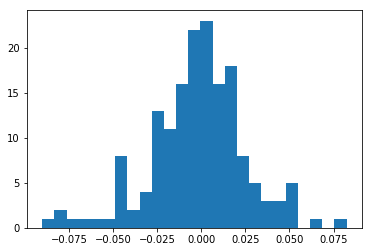

In [14]:
plt.hist(DC_Signal['B0_deltae'], bins=25)
plt.show()

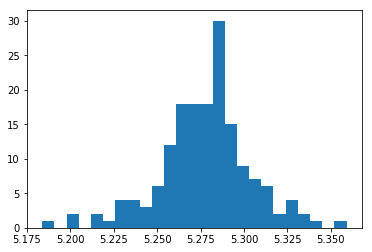

In [15]:
plt.hist(DC_Signal['B0_M'], bins=25)
plt.show()

## 7. Conclusion or additional comments (optional)

If you think somthing is missing feel free to add it. 
With 6 topics we can give 2 (non consecutive) topics for everybody. 
Having a little break between your two topics maybe helps a bit if something didn't go as expected. 